# WeatherPy

### Observations:
> - With the increase in latitude(that is., above equator), the maximum temperature in the cities is lower compared to the cities in the southern hemisphere. There is strong correlation between Latitude and maximum Temperature in the region. <br>
> - The cities in southern hemisphere has humidity more correlated to latitude than the cities in northern hemisphere.<br>
> - The correlation between latitude and cloudiness/wind speed is very little to none.<br>

In [87]:
# Dependencies and Setup
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
from pprint import pprint
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [90]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'City count: {len(cities)}')

City count: 616


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [91]:
#API call to OpenWeathermap.org to retrieve weather data for cities 
url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = []
cloudiness = []
country = []
date1 = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_Speed = []
error_city = []

cnum = 1
for city in cities:
    print(f'The data of city with number: {cnum} and name: {city} is getting retreived...')
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url).json()
    time.sleep(1)
    
    try:
        city_name.append(city)
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date1.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_Speed.append(response['wind']['speed'])
        print(f'The data of city with number: {cnum} and name: {city} is successfully retreived!')   
    except (KeyError, IndexError):
        error_city.append(city)
        city_name.pop()
        print(f'Missing field/result for {city} skipping...!')
        
    cnum +=1
    print("------------")

#Summary of city data retreived
print(f'\nThe weather data of {len(cities)} cities has been requested!\n')
print(f'The weather data for {len(error_city)} cities are not found!\n')
print(f'The weather data of {len(city_name)} cities has been successfully retrieved!')

The data of city with number: 1 and name: inta is getting retreived...
The data of city with number: 1 and name: inta is successfully retreived!
------------
The data of city with number: 2 and name: attawapiskat is getting retreived...
Missing field/result for attawapiskat skipping...!
------------
The data of city with number: 3 and name: magistralnyy is getting retreived...
The data of city with number: 3 and name: magistralnyy is successfully retreived!
------------
The data of city with number: 4 and name: pati is getting retreived...
The data of city with number: 4 and name: pati is successfully retreived!
------------
The data of city with number: 5 and name: borovskoy is getting retreived...
The data of city with number: 5 and name: borovskoy is successfully retreived!
------------
The data of city with number: 6 and name: narsaq is getting retreived...
The data of city with number: 6 and name: narsaq is successfully retreived!
------------
The data of city with number: 7 and n

Missing field/result for samusu skipping...!
------------
The data of city with number: 52 and name: labuhan is getting retreived...
The data of city with number: 52 and name: labuhan is successfully retreived!
------------
The data of city with number: 53 and name: albany is getting retreived...
The data of city with number: 53 and name: albany is successfully retreived!
------------
The data of city with number: 54 and name: vestmannaeyjar is getting retreived...
The data of city with number: 54 and name: vestmannaeyjar is successfully retreived!
------------
The data of city with number: 55 and name: cherskiy is getting retreived...
The data of city with number: 55 and name: cherskiy is successfully retreived!
------------
The data of city with number: 56 and name: bredasdorp is getting retreived...
The data of city with number: 56 and name: bredasdorp is successfully retreived!
------------
The data of city with number: 57 and name: san patricio is getting retreived...
The data of 

The data of city with number: 101 and name: usinsk is successfully retreived!
------------
The data of city with number: 102 and name: ginir is getting retreived...
The data of city with number: 102 and name: ginir is successfully retreived!
------------
The data of city with number: 103 and name: bereda is getting retreived...
The data of city with number: 103 and name: bereda is successfully retreived!
------------
The data of city with number: 104 and name: berlevag is getting retreived...
The data of city with number: 104 and name: berlevag is successfully retreived!
------------
The data of city with number: 105 and name: mar del plata is getting retreived...
The data of city with number: 105 and name: mar del plata is successfully retreived!
------------
The data of city with number: 106 and name: zanjan is getting retreived...
The data of city with number: 106 and name: zanjan is successfully retreived!
------------
The data of city with number: 107 and name: yhu is getting retr

The data of city with number: 151 and name: butler is successfully retreived!
------------
The data of city with number: 152 and name: alcaniz is getting retreived...
The data of city with number: 152 and name: alcaniz is successfully retreived!
------------
The data of city with number: 153 and name: santana is getting retreived...
The data of city with number: 153 and name: santana is successfully retreived!
------------
The data of city with number: 154 and name: athabasca is getting retreived...
The data of city with number: 154 and name: athabasca is successfully retreived!
------------
The data of city with number: 155 and name: bur gabo is getting retreived...
Missing field/result for bur gabo skipping...!
------------
The data of city with number: 156 and name: tura is getting retreived...
The data of city with number: 156 and name: tura is successfully retreived!
------------
The data of city with number: 157 and name: sao gabriel da cachoeira is getting retreived...
The data 

The data of city with number: 200 and name: mahebourg is successfully retreived!
------------
The data of city with number: 201 and name: dikson is getting retreived...
The data of city with number: 201 and name: dikson is successfully retreived!
------------
The data of city with number: 202 and name: ilulissat is getting retreived...
The data of city with number: 202 and name: ilulissat is successfully retreived!
------------
The data of city with number: 203 and name: thompson is getting retreived...
The data of city with number: 203 and name: thompson is successfully retreived!
------------
The data of city with number: 204 and name: popondetta is getting retreived...
The data of city with number: 204 and name: popondetta is successfully retreived!
------------
The data of city with number: 205 and name: wonthaggi is getting retreived...
The data of city with number: 205 and name: wonthaggi is successfully retreived!
------------
The data of city with number: 206 and name: halalo i

The data of city with number: 250 and name: ponta do sol is successfully retreived!
------------
The data of city with number: 251 and name: katsuura is getting retreived...
The data of city with number: 251 and name: katsuura is successfully retreived!
------------
The data of city with number: 252 and name: yar-sale is getting retreived...
The data of city with number: 252 and name: yar-sale is successfully retreived!
------------
The data of city with number: 253 and name: malwan is getting retreived...
Missing field/result for malwan skipping...!
------------
The data of city with number: 254 and name: mirpur mathelo is getting retreived...
The data of city with number: 254 and name: mirpur mathelo is successfully retreived!
------------
The data of city with number: 255 and name: anchorage is getting retreived...
The data of city with number: 255 and name: anchorage is successfully retreived!
------------
The data of city with number: 256 and name: fevralsk is getting retreived...

The data of city with number: 299 and name: tazovskiy is successfully retreived!
------------
The data of city with number: 300 and name: kant is getting retreived...
The data of city with number: 300 and name: kant is successfully retreived!
------------
The data of city with number: 301 and name: hami is getting retreived...
The data of city with number: 301 and name: hami is successfully retreived!
------------
The data of city with number: 302 and name: mitsamiouli is getting retreived...
The data of city with number: 302 and name: mitsamiouli is successfully retreived!
------------
The data of city with number: 303 and name: bontang is getting retreived...
The data of city with number: 303 and name: bontang is successfully retreived!
------------
The data of city with number: 304 and name: ngaoundere is getting retreived...
The data of city with number: 304 and name: ngaoundere is successfully retreived!
------------
The data of city with number: 305 and name: lebanon is getting r

The data of city with number: 348 and name: nizwa is successfully retreived!
------------
The data of city with number: 349 and name: paamiut is getting retreived...
The data of city with number: 349 and name: paamiut is successfully retreived!
------------
The data of city with number: 350 and name: yusva is getting retreived...
Missing field/result for yusva skipping...!
------------
The data of city with number: 351 and name: luanda is getting retreived...
The data of city with number: 351 and name: luanda is successfully retreived!
------------
The data of city with number: 352 and name: kaitangata is getting retreived...
The data of city with number: 352 and name: kaitangata is successfully retreived!
------------
The data of city with number: 353 and name: bud is getting retreived...
The data of city with number: 353 and name: bud is successfully retreived!
------------
The data of city with number: 354 and name: kazalinsk is getting retreived...
Missing field/result for kazalins

The data of city with number: 398 and name: mogok is successfully retreived!
------------
The data of city with number: 399 and name: quelimane is getting retreived...
The data of city with number: 399 and name: quelimane is successfully retreived!
------------
The data of city with number: 400 and name: nautla is getting retreived...
The data of city with number: 400 and name: nautla is successfully retreived!
------------
The data of city with number: 401 and name: toba is getting retreived...
The data of city with number: 401 and name: toba is successfully retreived!
------------
The data of city with number: 402 and name: aksarka is getting retreived...
The data of city with number: 402 and name: aksarka is successfully retreived!
------------
The data of city with number: 403 and name: ketchikan is getting retreived...
The data of city with number: 403 and name: ketchikan is successfully retreived!
------------
The data of city with number: 404 and name: staritsa is getting retrei

The data of city with number: 448 and name: dali is successfully retreived!
------------
The data of city with number: 449 and name: mineiros is getting retreived...
The data of city with number: 449 and name: mineiros is successfully retreived!
------------
The data of city with number: 450 and name: saint-pierre is getting retreived...
The data of city with number: 450 and name: saint-pierre is successfully retreived!
------------
The data of city with number: 451 and name: ilebo is getting retreived...
The data of city with number: 451 and name: ilebo is successfully retreived!
------------
The data of city with number: 452 and name: miri is getting retreived...
The data of city with number: 452 and name: miri is successfully retreived!
------------
The data of city with number: 453 and name: coahuayana is getting retreived...
The data of city with number: 453 and name: coahuayana is successfully retreived!
------------
The data of city with number: 454 and name: sai buri is getting

The data of city with number: 496 and name: oban is successfully retreived!
------------
The data of city with number: 497 and name: mackay is getting retreived...
The data of city with number: 497 and name: mackay is successfully retreived!
------------
The data of city with number: 498 and name: college is getting retreived...
The data of city with number: 498 and name: college is successfully retreived!
------------
The data of city with number: 499 and name: saint leonard is getting retreived...
The data of city with number: 499 and name: saint leonard is successfully retreived!
------------
The data of city with number: 500 and name: ganzhou is getting retreived...
The data of city with number: 500 and name: ganzhou is successfully retreived!
------------
The data of city with number: 501 and name: portland is getting retreived...
The data of city with number: 501 and name: portland is successfully retreived!
------------
The data of city with number: 502 and name: ahipara is gett

The data of city with number: 546 and name: oktyabrskoye is successfully retreived!
------------
The data of city with number: 547 and name: mangulile is getting retreived...
The data of city with number: 547 and name: mangulile is successfully retreived!
------------
The data of city with number: 548 and name: wheatley is getting retreived...
The data of city with number: 548 and name: wheatley is successfully retreived!
------------
The data of city with number: 549 and name: vila franca do campo is getting retreived...
The data of city with number: 549 and name: vila franca do campo is successfully retreived!
------------
The data of city with number: 550 and name: severobaykalsk is getting retreived...
The data of city with number: 550 and name: severobaykalsk is successfully retreived!
------------
The data of city with number: 551 and name: xichang is getting retreived...
The data of city with number: 551 and name: xichang is successfully retreived!
------------
The data of city 

Missing field/result for mentok skipping...!
------------
The data of city with number: 597 and name: smolenka is getting retreived...
The data of city with number: 597 and name: smolenka is successfully retreived!
------------
The data of city with number: 598 and name: kerteh is getting retreived...
Missing field/result for kerteh skipping...!
------------
The data of city with number: 599 and name: deputatskiy is getting retreived...
The data of city with number: 599 and name: deputatskiy is successfully retreived!
------------
The data of city with number: 600 and name: vychegodskiy is getting retreived...
The data of city with number: 600 and name: vychegodskiy is successfully retreived!
------------
The data of city with number: 601 and name: ayan is getting retreived...
The data of city with number: 601 and name: ayan is successfully retreived!
------------
The data of city with number: 602 and name: waingapu is getting retreived...
The data of city with number: 602 and name: wa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [92]:
#Dictionary to store the weather data
weather_dict = {"City":city_name,"Cloudiness":cloudiness,"Country":country,"Date":date1,
              "Humidity":humidity,"Latitude":latitude,"Longitude":longitude,
              "Max Temperature":max_temp,"Wind Speed":wind_Speed}

weather_df = pd.DataFrame(weather_dict)
weather_df.index.rename('City ID', inplace=True)

#Writes the dataframe output to file cities.csv
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
City ID,,,,,,,,,
0,inta,100,RU,1615600548,90,66.0317,60.1659,12.33,25.01
1,magistralnyy,100,RU,1615600553,88,56.1725,107.4458,30.67,3.85
2,pati,97,ID,1615600555,77,-6.7559,111.0380,83.64,1.10
3,borovskoy,57,KZ,1615600557,92,53.8000,64.1500,-1.70,8.97
4,narsaq,64,GL,1615600559,45,60.9167,-46.0500,15.80,9.22


In [93]:
number_of_cities = weather_df['City'].nunique()
print(f'The weather information of {number_of_cities} cities are in the dataframe.')

The weather information of 558 cities are in the dataframe.


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [94]:
#  Get the indices of cities that have humidity over 100%.
outlier_humid = weather_df.index[weather_df['Humidity'] > 100]

outliers_index_list = outlier_humid.to_list()
print(f'The index of city with humidity > 100% : {outliers_index_list}')

The index of city with humidity > 100% : []


In [95]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "weather_data".
if len(outliers_index_list) == 0:
    weather_data = weather_df
    print(f'There are no cities with humidity > 100%.')
else:
    weather_data = weather_df.drop(outliers_index_list,inplace=False)

weather_data.head()

There are no cities with humidity > 100%.


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
City ID,,,,,,,,,
0,inta,100,RU,1615600548,90,66.0317,60.1659,12.33,25.01
1,magistralnyy,100,RU,1615600553,88,56.1725,107.4458,30.67,3.85
2,pati,97,ID,1615600555,77,-6.7559,111.0380,83.64,1.10
3,borovskoy,57,KZ,1615600557,92,53.8000,64.1500,-1.70,8.97
4,narsaq,64,GL,1615600559,45,60.9167,-46.0500,15.80,9.22


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


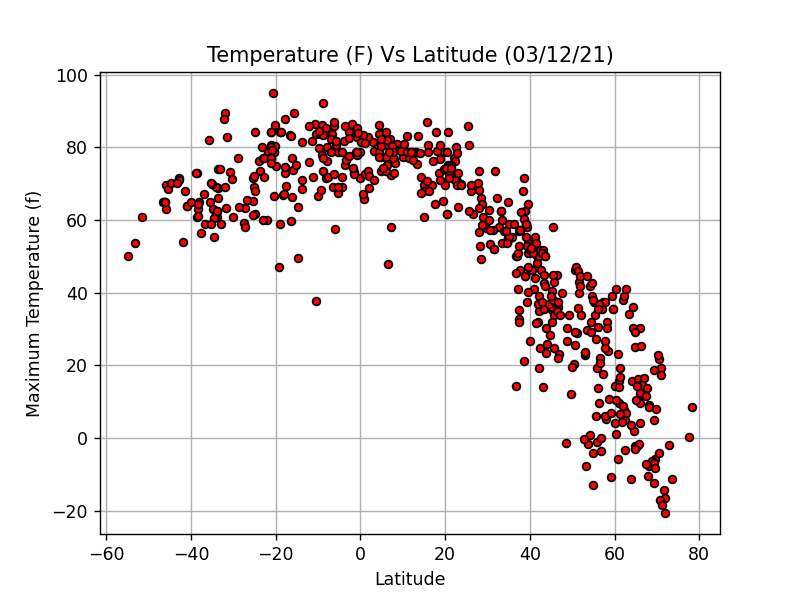

In [96]:
lat_temp = weather_data.plot(kind = 'scatter',x = 'Latitude', y= 'Max Temperature',
                  marker = 'o', c = 'red',
                  title = 'Temperature (F) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')',
                  grid = True,edgecolors='black')

plt.ylabel("Maximum Temperature (f)")
lat_temp.set_axisbelow(True)
plt.savefig("Output Data/Images/lat_vs_temp.png")
plt.show()

**Analysis:**
> - This scatter plot shows the relation between `Latitude` and `Maximum Temperature` for the cities in the list.<br>
> - With the increase in latitude(that is., above equator), the maximum temperature in the cities are getting reduced. We can see a strong relationship between Latitude and maximum Temperature in the region.

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


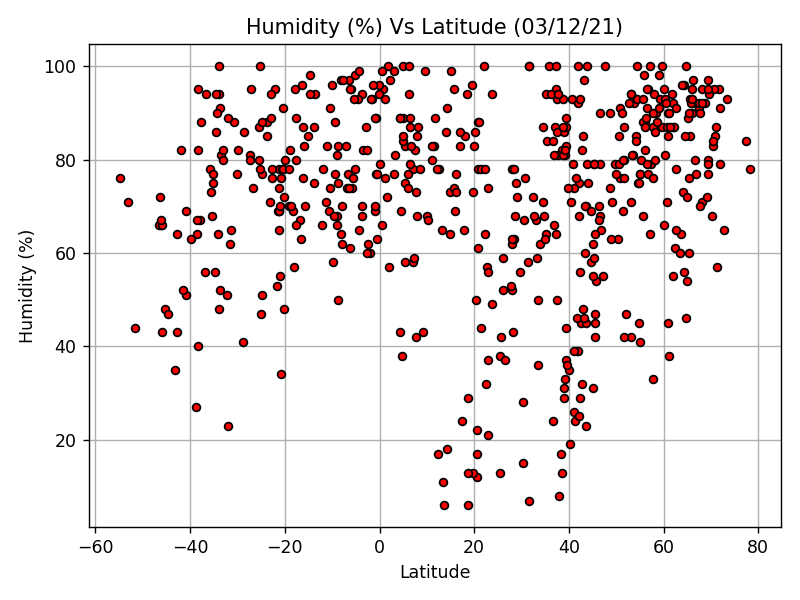

In [97]:
lat_humid = weather_data.plot(kind = 'scatter',x = 'Latitude', y= 'Humidity', c= 'red',
                  title = 'Humidity (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')',
                  grid = True,edgecolors='black')

plt.ylabel("Humidity (%)")
lat_humid.set_axisbelow(True)
plt.savefig("Output Data/Images/lat_vs_humidity.png")
plt.show()
plt.tight_layout()

**Analysis:**
> - This scatter plot shows the relation between `Latitude` and `Humidity` for the cities in the list.<br>
> - We could not find a specific pattern in the weather data with respect to humidity. The data is spread all over the x-axis. Latitude and humidity does not have strong relations between them.

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


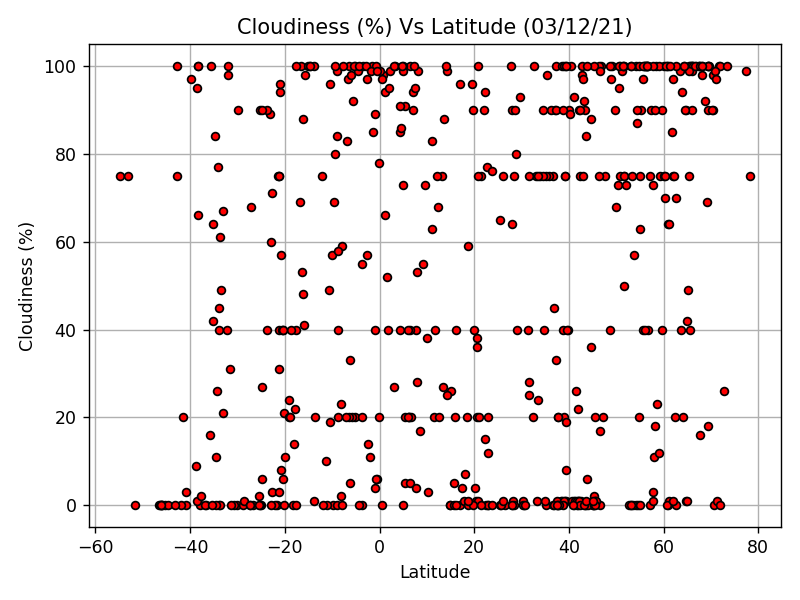

In [98]:
lat_cloud = weather_data.plot(kind = 'scatter',x = 'Latitude', y= 'Cloudiness', c= 'red',
                  title = 'Cloudiness (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')',
                  grid = True,edgecolors='black')

lat_cloud.set_ylabel("Cloudiness (%)")
lat_cloud.set_axisbelow(True)
plt.savefig("Output Data/Images/lat_vs_cloudiness.png")
plt.show()
plt.tight_layout()

**Analysis:**
> - This scatter plot shows the relation between `Latitude` and `Cloudiness` for the cities in the list.<br>
> - We could not find a specific pattern in the weather data with respect to Cloudiness. The data is spread all over the x-axis. Latitude and cloudiness does not have strong relations between them.

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


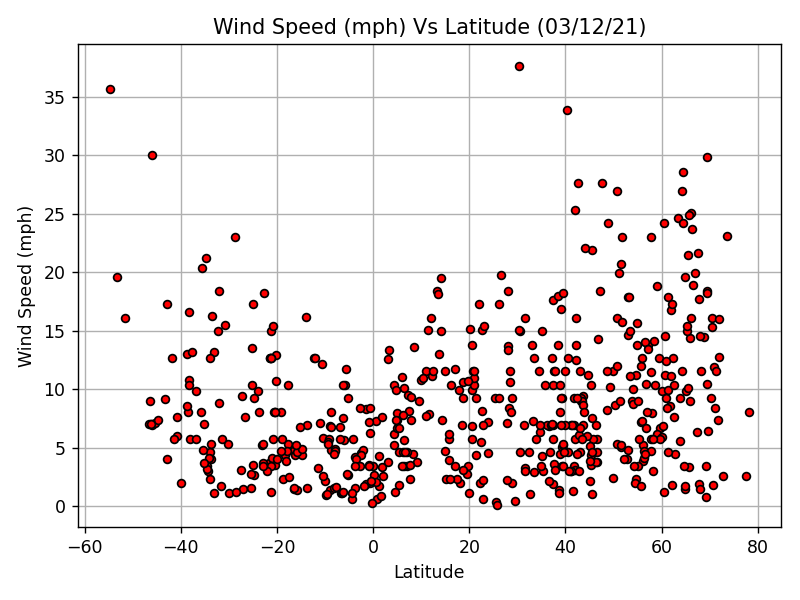

In [99]:
lat_wind_speed = weather_data.plot(kind = 'scatter',x = 'Latitude', y= 'Wind Speed',c = 'red',
                  title = 'Wind Speed (mph) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')',
                  grid = True,edgecolors='black')

lat_wind_speed.set_ylabel("Wind Speed (mph)")
lat_wind_speed.set_axisbelow(True)
plt.savefig("Output Data/Images/lat_vs_wind_speed.png")
plt.show()
plt.tight_layout()

**Analysis:**
> - This scatter plot shows the relation between `Latitude` and `Wind Speed` for the cities in the list.<br>
> - We could not find a specific pattern in the weather data with respect to Wind Speed. The data is spread all over the x-axis. Latitude and Wind Speed does not have strong relations between them.

## Linear Regression

In [100]:
#Weather data for cities in northern hemisphere
weather_north_hemis = weather_data.loc[weather_data['Latitude'] >= 0]
weather_north_hemis_df = weather_north_hemis.reset_index(drop = True)

#Weather data for cities in southern hemisphere
weather_south_hemis = weather_data.loc[weather_data['Latitude'] < 0]
weather_south_hemis_df = weather_south_hemis.reset_index(drop = True)

north_hemis_x = weather_north_hemis_df['Latitude']
south_hemis_x = weather_south_hemis_df['Latitude']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


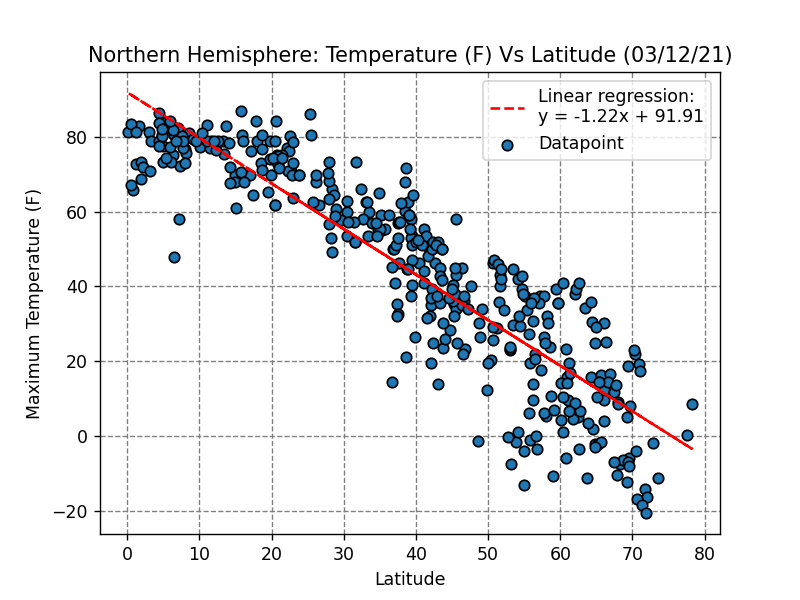

The correlation coefficient between temperature and latitude in northern hemisphere is: (-0.8971756623731153, 3.222610686934813e-136)


In [101]:
north_temp_y = weather_north_hemis_df['Max Temperature']

slope_nt,intercept_nt,rvalue_nt,pvalue_nt,stderr_nt = linregress(north_hemis_x,north_temp_y)
regress_value_nt = north_hemis_x * slope_nt + intercept_nt
line_temp_eq = "y = " + str(round(slope_nt,2)) + "x + " + str(round(intercept_nt,2))

fig,ax1 = plt.subplots()
ax1.scatter(north_hemis_x,north_temp_y,label = "Datapoint",edgecolors = 'black')
ax1.plot(north_hemis_x,regress_value_nt,"--",color='r',label = "Linear regression:\n"+line_temp_eq)


ax1.set_title('Northern Hemisphere: Temperature (F) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Maximum Temperature (F)')
plt.legend(loc = "best")
ax1.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')

plt.savefig("Output Data/Images/north_hemis_lat_vs_temp.png")
plt.show()

corr_temp_n = pearsonr(north_hemis_x,north_temp_y)
print(f'The correlation coefficient between temperature and latitude in northern hemisphere is: {corr_temp_n}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


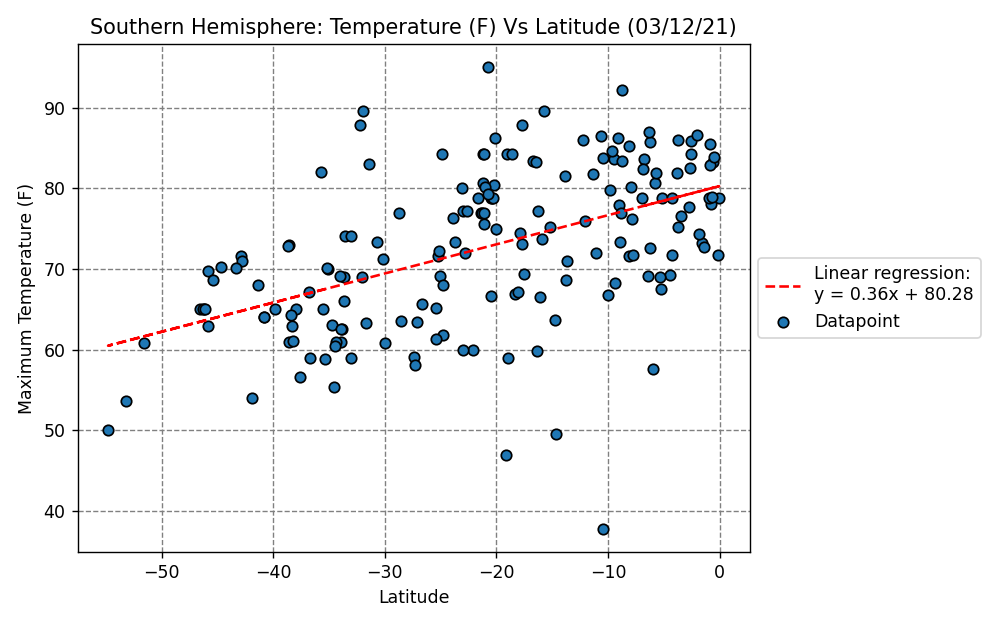

The correlation coefficient between temperature and latitude in southern hemisphere is: (0.5088187350354565, 4.1173428115313157e-13)


In [102]:
south_temp_y = weather_south_hemis_df['Max Temperature']

slope_st,intercept_st,rvalue_st,pvalue_st,stderr_st = linregress(south_hemis_x,south_temp_y)
regress_value_st = south_hemis_x * slope_st + intercept_st
line_temp2_eq = "y = " + str(round(slope_st,2)) + "x + " + str(round(intercept_st,2))

fig,ax2 = plt.subplots(1,1,figsize = (8,5))
ax2.scatter(south_hemis_x,south_temp_y,label = "Datapoint",edgecolors = 'black')
ax2.plot(south_hemis_x,regress_value_st,'r--',color='r',label = "Linear regression:\n" + line_temp2_eq)

ax2.set_title('Southern Hemisphere: Temperature (F) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Maximum Temperature (F)')
ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax2.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')

plt.savefig("Output Data/Images/south_hemis_lat_vs_temp.png")
plt.show()
plt.tight_layout()

corr_temp = pearsonr(south_hemis_x,south_temp_y)
print(f'The correlation coefficient between temperature and latitude in southern hemisphere is: {corr_temp}')

**Analysis:**
> - From the plots `Northern Hemisphere - Temperature (F) vs. Latitude` & `Southern Hemisphere - Temperature (F) vs. Latitude`, we can find that the maximum temperature felt is increasing as we move towards the equator.<br>
> - In the northern hemisphere, temperature and latitude has a strong negative correlation (-0.9).<br>                         
> - In the souther hemisphere, temperature and latitude has a moderate positive correlation (0.5). 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


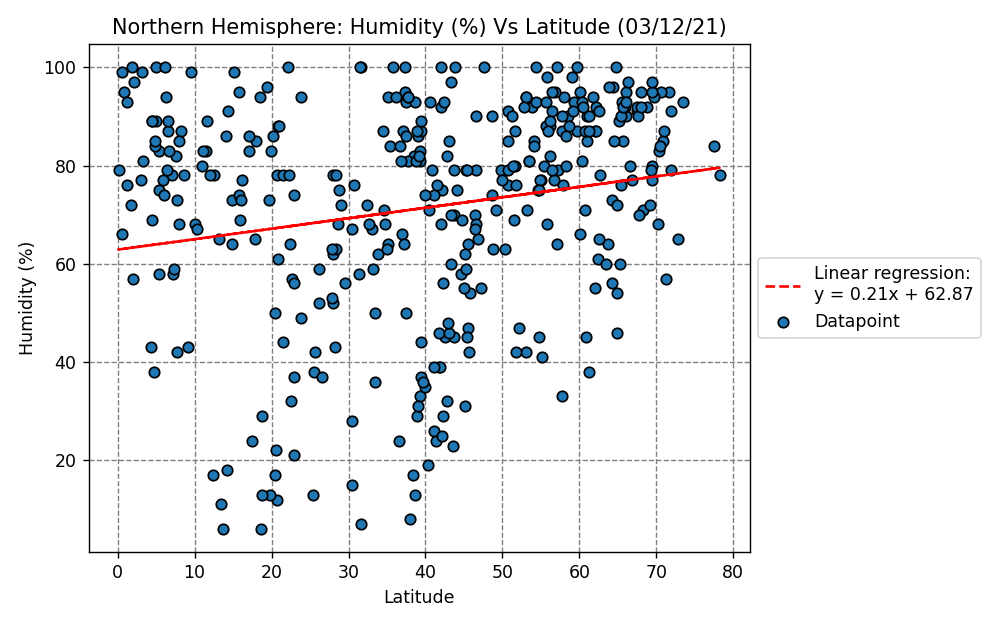

The correlation coefficient between humidity and latitude is: (0.19159532728096312, 0.00017165833304071625)


In [103]:
north_humid_y = weather_north_hemis_df['Humidity']

slope_nh,intercept_nh,rvalue_nh,pvalue_nh,stderr_nh = linregress(north_hemis_x,north_humid_y)
regress_value_nh = north_hemis_x * slope_nh + intercept_nh
line_humid1_eq = "y = " + str(round(slope_nh,2)) + "x + " + str(round(intercept_nh,2))

fig,ax3 = plt.subplots(1,1,figsize = (8,5))
ax3.scatter(north_hemis_x,north_humid_y,label = "Datapoint",edgecolors = 'black')
ax3.plot(north_hemis_x,regress_value_nh,"--",color='r',label = "Linear regression:\n" + line_humid1_eq)

ax3.set_title('Northern Hemisphere: Humidity (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Humidity (%)')
ax3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(color='gray', linestyle='dashed')
ax3.set_axisbelow(True)

plt.savefig("Output Data/Images/north_hemis_lat_vs_humid.png")
plt.show()
plt.tight_layout()

corr_humid_n = pearsonr(north_hemis_x,north_humid_y)
print(f'The correlation coefficient between humidity and latitude is: {corr_humid_n}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


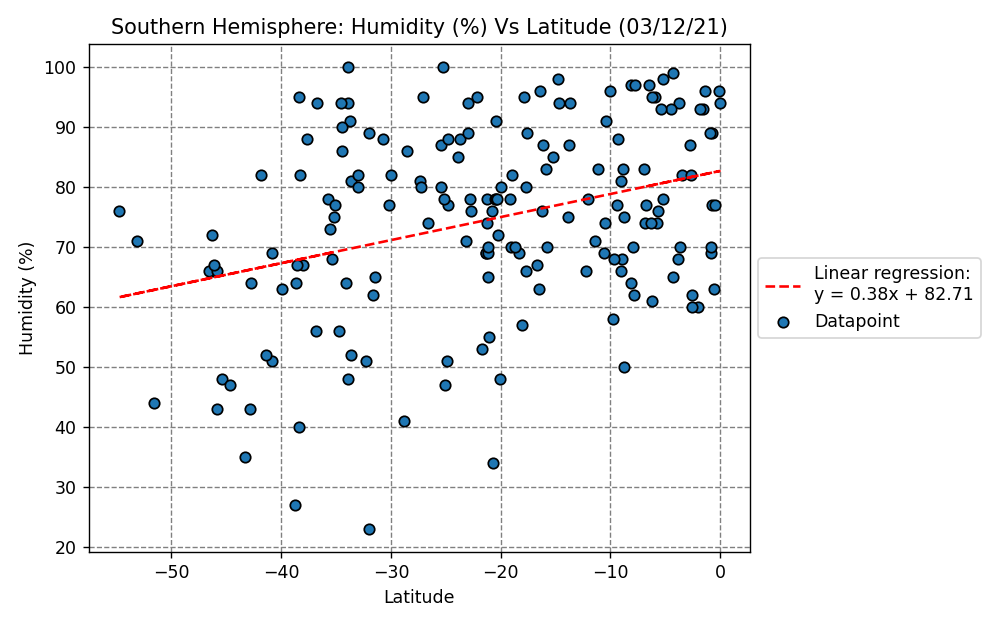

The correlation coefficient between humidity and latitude is: (0.5088187350354565, 4.1173428115313157e-13)


In [104]:
south_humid_y = weather_south_hemis_df['Humidity']

slope_sh,intercept_sh,rvalue_sh,pvalue_sh,stderr_sh = linregress(south_hemis_x,south_humid_y)
regress_value_sh = south_hemis_x * slope_sh + intercept_sh
line_humid2_eq = "y = " + str(round(slope_sh,2)) + "x + " + str(round(intercept_sh,2))

fig,ax4 = plt.subplots(1,1,figsize = (8,5))
ax4.scatter(south_hemis_x,south_humid_y,label = "Datapoint",edgecolors = 'black')
ax4.plot(south_hemis_x,regress_value_sh,"--",color='r',label = "Linear regression:\n" + line_humid2_eq)

ax4.set_title('Southern Hemisphere: Humidity (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Humidity (%)')
ax4.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax4.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')

plt.savefig("Output Data/Images/south_hemis_lat_vs_humid.png")
plt.show()
plt.tight_layout()

corr_humid_s = pearsonr(south_hemis_x,south_temp_y)
print(f'The correlation coefficient between humidity and latitude is: {corr_humid_s}')

**Analysis:**
> - From the plots `Northern Hemisphere - Humidity vs. Latitude` & `Southern Hemisphere - Humidity vs. Latitude`, we can find that there is not much strong relation between data.<br>
> - In the northern hemisphere, humidity and latitude has a week positive correlation (0.4).<br>
> - In the souther hemisphere, humidity and latitude has a moderate positive correlation(0.6).<br>
> - It concludes that humidity and latitude are more correlated in the southern hemisphere than the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


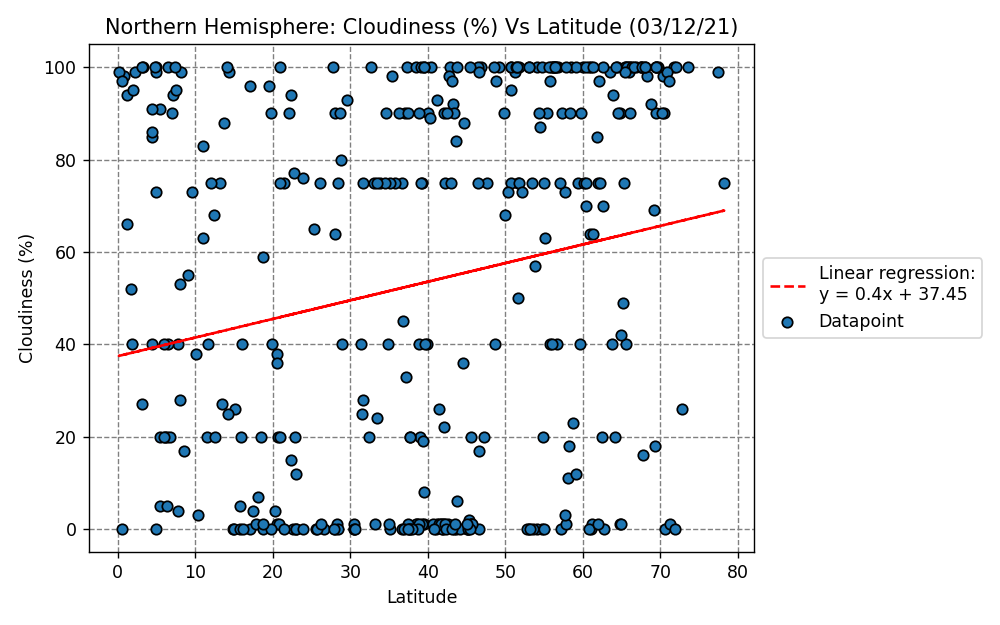

The correlation coefficient between cloudiness and latitude is: (0.20134712225059873, 7.730636642078848e-05)


In [105]:
north_cloud_y = weather_north_hemis_df['Cloudiness']

slope_nc,intercept_nc,rvalue_nc,pvalue_nc,stderr_nc = linregress(north_hemis_x,north_cloud_y)
regress_value_nc = north_hemis_x * slope_nc + intercept_nc
line_cloud1_eq = "y = " + str(round(slope_nc,2)) + "x + " + str(round(intercept_nc,2))

fig,ax5 = plt.subplots(1,1,figsize = (8,5))
ax5.scatter(north_hemis_x,north_cloud_y,label = "Datapoint",edgecolors = 'black')
ax5.plot(north_hemis_x,regress_value_nc,"--",color='r',label = "Linear regression:\n" + line_cloud1_eq)

ax5.set_title('Northern Hemisphere: Cloudiness (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax5.set_xlabel('Latitude')
ax5.set_ylabel('Cloudiness (%)')
ax5.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax5.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')

plt.savefig("Output Data/Images/north_hemis_lat_vs_cloud.png")
plt.show()
plt.tight_layout()

corr_cloud_n = pearsonr(north_hemis_x,north_cloud_y)
print(f'The correlation coefficient between cloudiness and latitude is: {corr_cloud_n}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


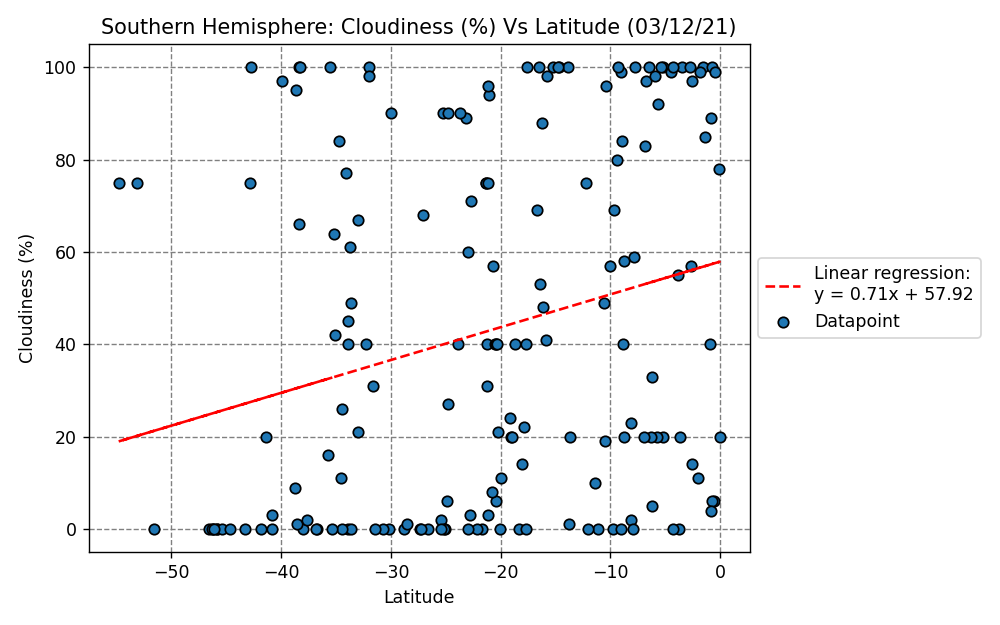

The correlation coefficient between cloudiness and latitude is: (0.25168275372203147, 0.0007016607205762506)


In [106]:
south_cloud_y = weather_south_hemis_df['Cloudiness']

slope_sc,intercept_sc,rvalue_sc,pvalue_sc,stderr_sc = linregress(south_hemis_x,south_cloud_y)
regress_value_sc = south_hemis_x * slope_sc + intercept_sc
line_cloud2_eq = "y = " + str(round(slope_sc,2)) + "x + " + str(round(intercept_sc,2))

fig,ax6 = plt.subplots(1,1,figsize = (8,5))
ax6.scatter(south_hemis_x,south_cloud_y,label = "Datapoint",edgecolors = 'black')
ax6.plot(south_hemis_x,regress_value_sc,"--",color='r',label = "Linear regression:\n" + line_cloud2_eq)

ax6.set_title('Southern Hemisphere: Cloudiness (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax6.set_xlabel('Latitude')
ax6.set_ylabel('Cloudiness (%)')
ax6.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax6.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')

plt.savefig("Output Data/Images/south_hemis_lat_vs_cloud.png")
plt.show()
plt.tight_layout()

corr_cloud_s = pearsonr(south_hemis_x,south_cloud_y)
print(f'The correlation coefficient between cloudiness and latitude is: {corr_cloud_s}')


**Analysis:**
> - From the plots `Northern Hemisphere - Cloudiness vs. Latitude` & `Southern Hemisphere - Cloudiness vs. Latitude`, we can find that there is not much strong relation between data.
> - In the northern hemisphere, Cloudiness and latitude has a week positive correlation(0.1).
> - In the souther hemisphere, Cloudiness and latitude has a week positive correlation(0.2).
> - It concludes that Cloudiness and latitude are not correlated.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


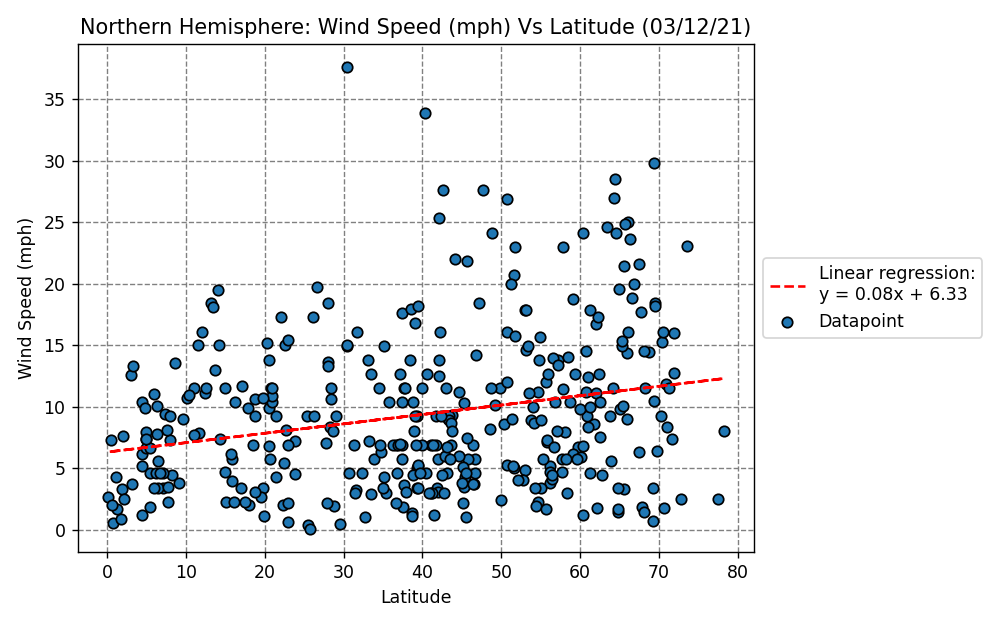

The correlation coefficient between wind speed and latitude is: (0.24405414024947894, 1.4733548985998438e-06)


In [107]:
north_wind_speed_y = weather_north_hemis_df['Wind Speed']

slope_nws,intercept_nws,rvalue_nws,pvalue_nws,stderr_nws = linregress(north_hemis_x,north_wind_speed_y)
regress_value_nws = north_hemis_x * slope_nws + intercept_nws
line_ws_eq = "y = " + str(round(slope_nws,2)) + "x + " + str(round(intercept_nws,2))

fig,ax7 = plt.subplots(1,1,figsize = (8,5))
ax7.scatter(north_hemis_x,north_wind_speed_y,label = "Datapoint",edgecolors = 'black')
ax7.plot(north_hemis_x,regress_value_nws,"--",color='r',label = "Linear regression:\n" + line_ws_eq)

ax7.set_title('Northern Hemisphere: Wind Speed (mph) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax7.set_xlabel('Latitude')
ax7.set_ylabel('Wind Speed (mph)')
ax7.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax7.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')

plt.savefig("Output Data/Images/north_hemis_lat_vs_windSpeed.png")
plt.show()
plt.tight_layout()

corr_wind_speed_n = pearsonr(north_hemis_x,north_wind_speed_y)
print(f'The correlation coefficient between wind speed and latitude is: {corr_wind_speed_n}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


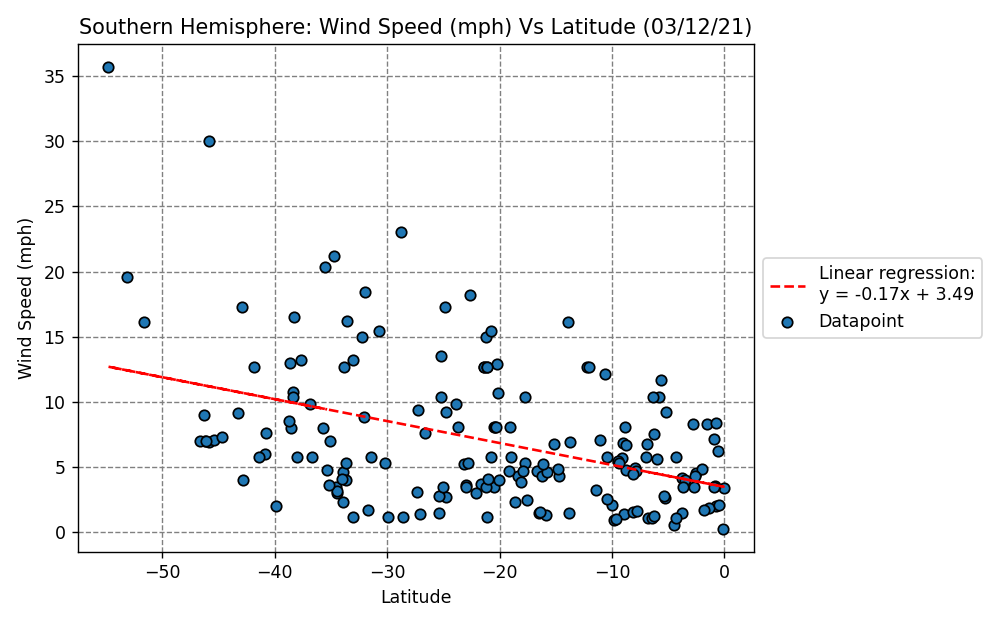

The correlation coefficient between wind speed and latitude is: (0.25168275372203147, 0.0007016607205762506)


In [108]:
south_wind_speed_y = weather_south_hemis_df['Wind Speed']

slope_sws,intercept_sws,rvalue_sws,pvalue_sws,stderr_sws = linregress(south_hemis_x,south_wind_speed_y)
regress_value_sws = south_hemis_x * slope_sws + intercept_sws
line_ws2_eq = "y = " + str(round(slope_sws,2)) + "x + " + str(round(intercept_sws,2))

fig,ax8 = plt.subplots(1,1,figsize = (8,5))
ax8.scatter(south_hemis_x,south_wind_speed_y,label = "Datapoint",edgecolors = 'black')
ax8.plot(south_hemis_x,regress_value_sws,"--",color='r',label = "Linear regression:\n" + line_ws2_eq)

ax8.set_title('Southern Hemisphere: Wind Speed (mph) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax8.set_xlabel('Latitude')
ax8.set_ylabel('Wind Speed (mph)')
ax8.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax8.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')

plt.savefig("Output Data/Images/south_hemis_lat_vs_windSpeed.png")
plt.show()
plt.tight_layout()

corr_wind_speed_s = pearsonr(south_hemis_x,south_cloud_y)
print(f'The correlation coefficient between wind speed and latitude is: {corr_wind_speed_s}')

**Analysis:**
> - From the plots `Northern Hemisphere - wind speed vs. Latitude` & `Southern Hemisphere - wind speed vs. Latitude`, we can find that there is not much strong relation between data.<br>
> - In the northern hemisphere, wind speed and latitude has a week positive correlation(0.1).<br>
> - In the souther hemisphere, wind speed and latitude has a week positive correlation(0.2).<br>
> - It concludes that wind speed and latitude are not correlated.